In [17]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime

import mpl_toolkits
import cartopy

degree_sign = u'\u00B0'

% matplotlib inline

In [2]:
run_info = '50km_idealized_noahmp_ens_mean'

# Open data

In [3]:
data_dir = '/Users/baird/Dropbox/_data_WRF/030.co2_400.idealized.50km.noahmp.1hr.stoch.ensemble/concat_nc_files/'
filename_prefix = 'wrfout_d01_ens_mean_001_010'
#filename_prefix = 'wrfout_d01_2010-01-01_00:00:00_2010-04-30_00:00:00'

time_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'Times' + '.nc')
xlat_ncfile = netCDF4.Dataset(data_dir + 'wrfout_d01_2010-01-01_00:00:00' + '_' + 'XLAT' + '.nc')
xlong_ncfile = netCDF4.Dataset(data_dir + 'wrfout_d01_2010-01-01_00:00:00' + '_' + 'XLONG' + '.nc')
lh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'LH' + '.nc')
rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'RAINC' + '.nc')
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'RAINNC' + '.nc')
#t2_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'T2' + '.nc')
qfx_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'QFX' + '.nc')
landmask_ncfile = netCDF4.Dataset(data_dir + 'wrfout_d01_2010-01-01_00:00:00' + '_' + 'LANDMASK' + '.nc')

ecan_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'ECAN' + '.nc')
edir_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'EDIR' + '.nc')
etran_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'ETRAN' + '.nc')

In [4]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

lh_400 = lh_ncfile.variables['LH'][:]
rainc_400 = rainc_ncfile.variables['RAINC'][:]
rainnc_400 = rainnc_ncfile.variables['RAINNC'][:]
qfx_400 = qfx_ncfile.variables['QFX'][:]*86400.

ecan_400 = ecan_ncfile.variables['ECAN'][:]*86400.
edir_400 = edir_ncfile.variables['EDIR'][:]*86400.
etran_400 = etran_ncfile.variables['ETRAN'][:]*86400.

# import 031

In [5]:
data_dir = '/Users/baird/Dropbox/_data_WRF/031.co2_1000.idealized.50km.noahmp.1hr.stoch.ensemble/concat_nc_files/'
filename_prefix = 'wrfout_d01_ens_mean_001_010'

time_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'Times' + '.nc')
#xlat_ncfile = netCDF4.Dataset(data_dir + 'wrfout_d01_2010-01-01_00:00:00' + '_' + 'XLAT' + '.nc')
#xlong_ncfile = netCDF4.Dataset(data_dir + 'wrfout_d01_2010-01-01_00:00:00' + '_' + 'XLONG' + '.nc')
lh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'LH' + '.nc')
rainc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'RAINC' + '.nc')
rainnc_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'RAINNC' + '.nc')
#t2_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'T2' + '.nc')
qfx_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'QFX' + '.nc')
#landmask_ncfile = netCDF4.Dataset(data_dir + 'wrfout_d01_2010-01-01_00:00:00' + '_' + 'LANDMASK' + '.nc')

ecan_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'ECAN' + '.nc')
edir_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'EDIR' + '.nc')
etran_ncfile = netCDF4.Dataset(data_dir + filename_prefix + '_' + 'ETRAN' + '.nc')

In [6]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

lh_1000 = lh_ncfile.variables['LH'][:]
rainc_1000 = rainc_ncfile.variables['RAINC'][:]
rainnc_1000 = rainnc_ncfile.variables['RAINNC'][:]
qfx_1000 = qfx_ncfile.variables['QFX'][:]*86400.

ecan_1000 = ecan_ncfile.variables['ECAN'][:]*86400.
edir_1000 = edir_ncfile.variables['EDIR'][:]*86400.
etran_1000 = etran_ncfile.variables['ETRAN'][:]*86400.

# get time stamps

In [7]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [8]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [22,23,0] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [1,2,3] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [4,5,6] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [7,8,9] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [10,11,12] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [13,14,15] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [16,17,18] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [19,20,21] for t in time_datetimes[skip_time:]]

# average ECAN profiles

In [9]:
# calculate 3 hourly means for 400
ecan_400_t00mean = numpy.mean(ecan_400[skip_time:,:,:][times_00,:,:], axis=0)
ecan_400_t03mean = numpy.mean(ecan_400[skip_time:,:,:][times_03,:,:], axis=0)
ecan_400_t06mean = numpy.mean(ecan_400[skip_time:,:,:][times_06,:,:], axis=0)
ecan_400_t09mean = numpy.mean(ecan_400[skip_time:,:,:][times_09,:,:], axis=0)
ecan_400_t12mean = numpy.mean(ecan_400[skip_time:,:,:][times_12,:,:], axis=0)
ecan_400_t15mean = numpy.mean(ecan_400[skip_time:,:,:][times_15,:,:], axis=0)
ecan_400_t18mean = numpy.mean(ecan_400[skip_time:,:,:][times_18,:,:], axis=0)
ecan_400_t21mean = numpy.mean(ecan_400[skip_time:,:,:][times_21,:,:], axis=0)

ecan_1000_t00mean = numpy.mean(ecan_1000[skip_time:,:,:][times_00,:,:], axis=0)
ecan_1000_t03mean = numpy.mean(ecan_1000[skip_time:,:,:][times_03,:,:], axis=0)
ecan_1000_t06mean = numpy.mean(ecan_1000[skip_time:,:,:][times_06,:,:], axis=0)
ecan_1000_t09mean = numpy.mean(ecan_1000[skip_time:,:,:][times_09,:,:], axis=0)
ecan_1000_t12mean = numpy.mean(ecan_1000[skip_time:,:,:][times_12,:,:], axis=0)
ecan_1000_t15mean = numpy.mean(ecan_1000[skip_time:,:,:][times_15,:,:], axis=0)
ecan_1000_t18mean = numpy.mean(ecan_1000[skip_time:,:,:][times_18,:,:], axis=0)
ecan_1000_t21mean = numpy.mean(ecan_1000[skip_time:,:,:][times_21,:,:], axis=0)

ecan_400_array = numpy.array([ecan_400_t00mean, ecan_400_t03mean, ecan_400_t06mean, ecan_400_t09mean, ecan_400_t12mean, ecan_400_t15mean, ecan_400_t18mean, ecan_400_t21mean])
ecan_1000_array = numpy.array([ecan_1000_t00mean, ecan_1000_t03mean, ecan_1000_t06mean, ecan_1000_t09mean, ecan_1000_t12mean, ecan_1000_t15mean, ecan_1000_t18mean, ecan_1000_t21mean])

ecan_diffs = ecan_1000_array - ecan_400_array
ecan_diffs_landmask = numpy.copy(ecan_diffs)
ecan_diffs_landmask[:,landmask==0] = numpy.nan

ecan_diffs_time_mean = numpy.mean(ecan_1000[skip_time:,:,:] - ecan_400[skip_time:,:,:], axis=0)
ecan_diffs_time_mean_landmask = numpy.copy(ecan_diffs_time_mean)
ecan_diffs_time_mean_landmask[landmask==0] = numpy.nan

# EDIR diffs (direct ground evaporation)

In [10]:
# calculate 3 hourly means for 400
edir_400_t00mean = numpy.mean(edir_400[skip_time:,:,:][times_00,:,:], axis=0)
edir_400_t03mean = numpy.mean(edir_400[skip_time:,:,:][times_03,:,:], axis=0)
edir_400_t06mean = numpy.mean(edir_400[skip_time:,:,:][times_06,:,:], axis=0)
edir_400_t09mean = numpy.mean(edir_400[skip_time:,:,:][times_09,:,:], axis=0)
edir_400_t12mean = numpy.mean(edir_400[skip_time:,:,:][times_12,:,:], axis=0)
edir_400_t15mean = numpy.mean(edir_400[skip_time:,:,:][times_15,:,:], axis=0)
edir_400_t18mean = numpy.mean(edir_400[skip_time:,:,:][times_18,:,:], axis=0)
edir_400_t21mean = numpy.mean(edir_400[skip_time:,:,:][times_21,:,:], axis=0)

edir_1000_t00mean = numpy.mean(edir_1000[skip_time:,:,:][times_00,:,:], axis=0)
edir_1000_t03mean = numpy.mean(edir_1000[skip_time:,:,:][times_03,:,:], axis=0)
edir_1000_t06mean = numpy.mean(edir_1000[skip_time:,:,:][times_06,:,:], axis=0)
edir_1000_t09mean = numpy.mean(edir_1000[skip_time:,:,:][times_09,:,:], axis=0)
edir_1000_t12mean = numpy.mean(edir_1000[skip_time:,:,:][times_12,:,:], axis=0)
edir_1000_t15mean = numpy.mean(edir_1000[skip_time:,:,:][times_15,:,:], axis=0)
edir_1000_t18mean = numpy.mean(edir_1000[skip_time:,:,:][times_18,:,:], axis=0)
edir_1000_t21mean = numpy.mean(edir_1000[skip_time:,:,:][times_21,:,:], axis=0)

edir_400_array = numpy.array([edir_400_t00mean, edir_400_t03mean, edir_400_t06mean, edir_400_t09mean, edir_400_t12mean, edir_400_t15mean, edir_400_t18mean, edir_400_t21mean])
edir_1000_array = numpy.array([edir_1000_t00mean, edir_1000_t03mean, edir_1000_t06mean, edir_1000_t09mean, edir_1000_t12mean, edir_1000_t15mean, edir_1000_t18mean, edir_1000_t21mean])

edir_diffs = edir_1000_array - edir_400_array
edir_diffs_landmask = numpy.copy(edir_diffs)
edir_diffs_landmask[:,landmask==0] = numpy.nan

edir_diffs_time_mean = numpy.mean(edir_1000[skip_time:,:,:] - edir_400[skip_time:,:,:], axis=0)
edir_diffs_time_mean_landmask = numpy.copy(edir_diffs_time_mean)
edir_diffs_time_mean_landmask[landmask==0] = numpy.nan

# ETRAN (evaporation from canopy)

In [11]:
# calculate 3 hourly means for 400
etran_400_t00mean = numpy.mean(etran_400[skip_time:,:,:][times_00,:,:], axis=0)
etran_400_t03mean = numpy.mean(etran_400[skip_time:,:,:][times_03,:,:], axis=0)
etran_400_t06mean = numpy.mean(etran_400[skip_time:,:,:][times_06,:,:], axis=0)
etran_400_t09mean = numpy.mean(etran_400[skip_time:,:,:][times_09,:,:], axis=0)
etran_400_t12mean = numpy.mean(etran_400[skip_time:,:,:][times_12,:,:], axis=0)
etran_400_t15mean = numpy.mean(etran_400[skip_time:,:,:][times_15,:,:], axis=0)
etran_400_t18mean = numpy.mean(etran_400[skip_time:,:,:][times_18,:,:], axis=0)
etran_400_etran1mean = numpy.mean(etran_400[skip_time:,:,:][times_21,:,:], axis=0)

etran_1000_t00mean = numpy.mean(etran_1000[skip_time:,:,:][times_00,:,:], axis=0)
etran_1000_t03mean = numpy.mean(etran_1000[skip_time:,:,:][times_03,:,:], axis=0)
etran_1000_t06mean = numpy.mean(etran_1000[skip_time:,:,:][times_06,:,:], axis=0)
etran_1000_t09mean = numpy.mean(etran_1000[skip_time:,:,:][times_09,:,:], axis=0)
etran_1000_t12mean = numpy.mean(etran_1000[skip_time:,:,:][times_12,:,:], axis=0)
etran_1000_t15mean = numpy.mean(etran_1000[skip_time:,:,:][times_15,:,:], axis=0)
etran_1000_t18mean = numpy.mean(etran_1000[skip_time:,:,:][times_18,:,:], axis=0)
etran_1000_etran1mean = numpy.mean(etran_1000[skip_time:,:,:][times_21,:,:], axis=0)

etran_400_array = numpy.array([etran_400_t00mean, etran_400_t03mean, etran_400_t06mean, etran_400_t09mean, etran_400_t12mean, etran_400_t15mean, etran_400_t18mean, etran_400_etran1mean])
etran_1000_array = numpy.array([etran_1000_t00mean, etran_1000_t03mean, etran_1000_t06mean, etran_1000_t09mean, etran_1000_t12mean, etran_1000_t15mean, etran_1000_t18mean, etran_1000_etran1mean])

etran_diffs = etran_1000_array - etran_400_array
etran_diffs_landmask = numpy.copy(etran_diffs)
etran_diffs_landmask[:,landmask==0] = numpy.nan

etran_diffs_time_mean = numpy.mean(etran_1000[skip_time:,:,:] - etran_400[skip_time:,:,:], axis=0)
etran_diffs_time_mean_landmask = numpy.copy(etran_diffs_time_mean)
etran_diffs_time_mean_landmask[landmask==0] = numpy.nan

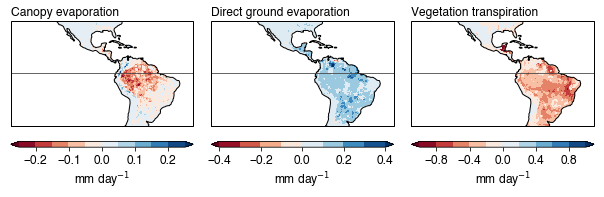

In [12]:
################################################################################
################################################################################

# MONTHLY MEAN PLOTS


fontsize = 12

# ECAN

levels = numpy.arange(-0.25,0.26,0.05)
fig = mp.figure(figsize=(8.5,2))

ax1 = fig.add_subplot(131, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

title = ax1.text(s='Canopy evaporation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
contour_plot1 = ax1.contourf(xlong, xlat, ecan_diffs_time_mean_landmask, levels=levels, cmap='RdBu', extend='both')
fig.tight_layout()
#fig.canvas.draw_idle()


#mp.show()
#fig.savefig('test.png', dpi=300, bbox_inches='tight', transparent=True)

# EDIR

levels = numpy.arange(-0.4,0.41,0.1)
#fig = mp.figure(figsize=(5,3.5))
ax2 = fig.add_subplot(132, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
ax2.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

title = ax2.text(s='Direct ground evaporation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
contour_plot2 = ax2.contourf(xlong, xlat, edir_diffs_time_mean_landmask, levels=levels, cmap='RdBu', extend='both')


# ETRAN

levels = numpy.arange(-1,1.1,0.2)
#fig = mp.figure(figsize=(5,3.5))
ax3 = fig.add_subplot(133, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
ax3.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

title = ax3.text(s='Vegetation transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
contour_plot3 = ax3.contourf(xlong, xlat, etran_diffs_time_mean_landmask, levels=levels, cmap='RdBu', extend='both')



fig.tight_layout()
fig.canvas.draw_idle()

bbox_position = ax1.get_position()

#cbar_axes = fig.add_axes([bbox_position.x0+bbox_position.width+0.03, bbox_position.y0, 0.02, bbox_position.height])
#cbar = mp.colorbar(contour_plot1, orientation='vertical', cax=cbar_axes)
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0-0.15, bbox_position.width, 0.04])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

bbox_position = ax2.get_position()

#cbar_axes = fig.add_axes([bbox_position.x0+bbox_position.width+0.03, bbox_position.y0, 0.02, bbox_position.height])
#cbar = mp.colorbar(contour_plot2, orientation='vertical', cax=cbar_axes)
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0-0.15, bbox_position.width, 0.04])
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(-0.4,0.41,0.2))


bbox_position = ax3.get_position()

#cbar_axes = fig.add_axes([bbox_position.x0+bbox_position.width+0.03, bbox_position.y0, 0.02, bbox_position.height])
#cbar = mp.colorbar(contour_plot3, orientation='vertical', cax=cbar_axes)
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0-0.15, bbox_position.width, 0.04])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)

fig.savefig(run_info+'_ECAN_EDIR_ETRAN.png', dpi=300, transparent=True, bbox_inches='tight')
# ETRAN

################################################################################
################################################################################

# Plot ECAN differences

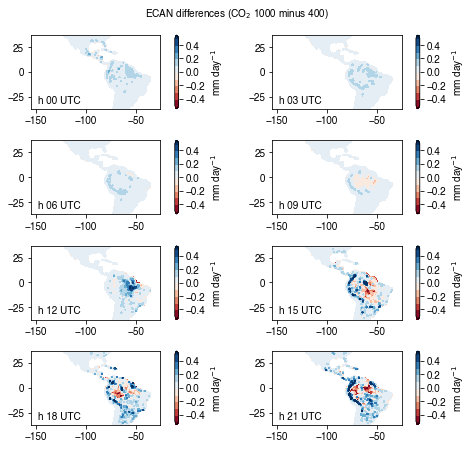

In [18]:
fontsize=10
fig = mp.figure(figsize=(7,6))

contour_levels = numpy.arange(-0.5,.6,0.1)
for i in range(n_intervals):
    
    ax = fig.add_subplot(4,2,i+1, aspect='equal')
    
    contour_plot = ax.contourf(xlong,\
                               xlat,\
                               ecan_diffs_landmask[i,:,:], \
                               levels=contour_levels, \
                               cmap='RdBu', \
                               extend='both')
    for c in contour_plot.collections:
        c.set_edgecolor("face")

    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
    cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
    cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)
    #cbar.set_ticks(ticks)
    cbar.solids.set_edgecolor('face')
    
    #cbar = mp.colorbar(contour_plot, label='W m$^{-2}$')
    #cbar.ax.tick_params(labelsize=fontsize)
    #cbar.set_ticks(ticks)
    #cbar.solids.set_edgecolor("face")

    ax.text(s='h '+hour_strings[i]+' UTC', x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)

fig.text(s='ECAN differences (CO$_2$ 1000 minus 400)', x=0.5, y=1.0, ha='center', va='bottom', fontsize=fontsize)
fig.tight_layout(w_pad=0)

fig.savefig('ECAN_differences_3hourly_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)

# Plot EDIR differences

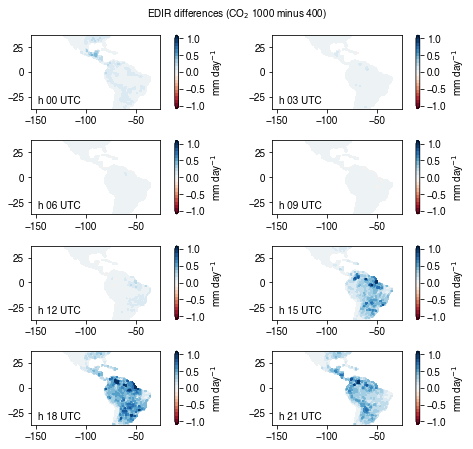

In [19]:
fontsize=10
fig = mp.figure(figsize=(7,6))

#contour_levels = numpy.arange(-0.75,0.751,0.1)
contour_levels = numpy.arange(-1,1.1,0.1)
ticks = numpy.arange(-1,1.1,0.5)
for i in range(n_intervals):
    
    ax = fig.add_subplot(4,2,i+1, aspect='equal')
    
    contour_plot = ax.contourf(xlong,xlat,edir_diffs_landmask[i,:,:], levels=contour_levels, cmap='RdBu', extend='both')
    for c in contour_plot.collections:
        c.set_edgecolor("face")

    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
    cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
    cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.set_ticks(ticks)
    cbar.solids.set_edgecolor('face')
    
    #cbar = mp.colorbar(contour_plot, label='W m$^{-2}$')
    #cbar.ax.tick_params(labelsize=fontsize)
    #cbar.set_ticks(ticks)
    #cbar.solids.set_edgecolor("face")

    ax.text(s='h '+hour_strings[i]+' UTC', x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    
fig.tight_layout(w_pad=0)
fig.text(s='EDIR differences (CO$_2$ 1000 minus 400)', x=0.5, y=1.0, ha='center', va='bottom', fontsize=fontsize)

fig.savefig('EDIR_differences_3hourly_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)

# Plot ETRAN differences

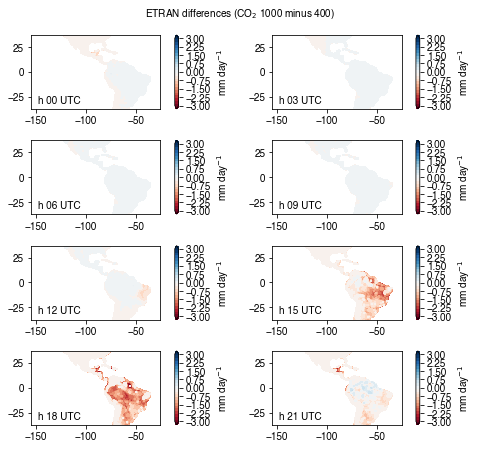

In [20]:
fontsize=10
fig = mp.figure(figsize=(7,6))

#contour_levels = numpy.arange(-0.75,0.751,0.1)
contour_levels = numpy.arange(-3,3.1,0.25)
#ticks = numpy.arange(-3,3.1,1)
for i in range(n_intervals):
    
    ax = fig.add_subplot(4,2,i+1, aspect='equal')
    
    contour_plot = ax.contourf(xlong,xlat,etran_diffs_landmask[i,:,:], levels=contour_levels, cmap='RdBu', extend='both')
    for c in contour_plot.collections:
        c.set_edgecolor("face")

    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
    cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
    cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)
    #cbar.set_ticks(ticks)
    cbar.solids.set_edgecolor('face')

    ax.text(s='h '+hour_strings[i]+' UTC', x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    
fig.tight_layout(w_pad=0)
fig.text(s='ETRAN differences (CO$_2$ 1000 minus 400)', x=0.5, y=1.0, ha='center', va='bottom', fontsize=fontsize)

fig.savefig('ETRAN_differences_3hourly_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)

# Plot all 3 summed

In [21]:
all_3_diffs_landmask = ecan_diffs_landmask[:,:,:]+edir_diffs_landmask[:,:,:]+etran_diffs_landmask[:,:,:]

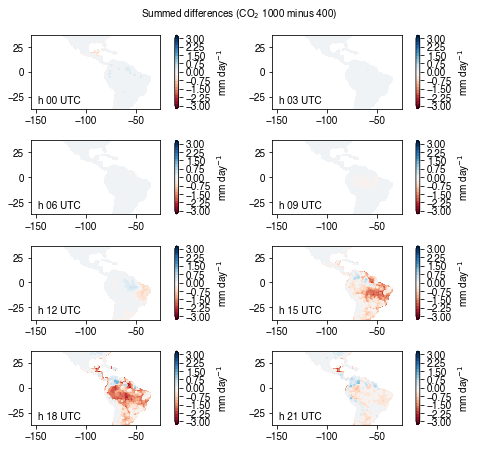

In [22]:
fontsize=10
fig = mp.figure(figsize=(7,6))

#contour_levels = numpy.arange(-0.75,0.751,0.1)
contour_levels = numpy.arange(-3,3.1,0.25)
#ticks = numpy.arange(-3,3.1,1)
for i in range(n_intervals):
    
    ax = fig.add_subplot(4,2,i+1, aspect='equal')
    
    contour_plot = ax.contourf(xlong,xlat,all_3_diffs_landmask[i,:,:], levels=contour_levels, cmap='RdBu', extend='both')
    for c in contour_plot.collections:
        c.set_edgecolor("face")

    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
    cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
    cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
    cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)
    #cbar.set_ticks(ticks)
    cbar.solids.set_edgecolor('face')

    ax.text(s='h '+hour_strings[i]+' UTC', x=0.05, y=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    
fig.tight_layout(w_pad=0)
fig.text(s='Summed differences (CO$_2$ 1000 minus 400)', x=0.5, y=1.0, ha='center', va='bottom', fontsize=fontsize)

fig.savefig('summed_differences_3hourly_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)

# ECAN time mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


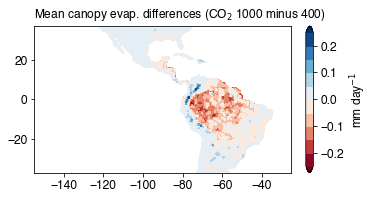

In [23]:
fontsize = 12
fig = mp.figure(figsize=(5,4))

ax = fig.add_subplot(111, aspect='equal')
contour_levels = numpy.arange(-0.25,.26,0.05)
contour_plot = ax.contourf(xlong,xlat,numpy.nanmean(ecan_diffs_landmask, axis=0), levels=contour_levels, extend='both', cmap='RdBu')
ax.tick_params(labelsize=fontsize)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(ticks)
cbar.solids.set_edgecolor('face')

for c in contour_plot.collections:
    c.set_edgecolor('face')

ax.text(s='Mean canopy evap. differences (CO$_2$ 1000 minus 400)', x=0., y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.savefig('ECAN_differences_mean_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)

# EDIR time mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


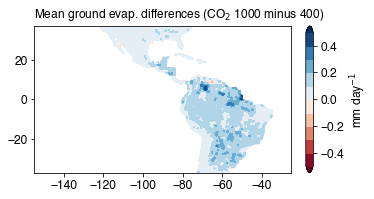

In [24]:
fontsize = 12
fig = mp.figure(figsize=(5,4))

ax = fig.add_subplot(111, aspect='equal')
contour_levels = numpy.arange(-0.5,.6,0.1)
contour_plot = ax.contourf(xlong,xlat,numpy.nanmean(edir_diffs_landmask, axis=0), levels=contour_levels, extend='both', cmap='RdBu')
ax.tick_params(labelsize=fontsize)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(ticks)
cbar.solids.set_edgecolor('face')

for c in contour_plot.collections:
    c.set_edgecolor('face')

ax.text(s='Mean ground evap. differences (CO$_2$ 1000 minus 400)', x=0., y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.savefig('EDIR_differences_mean_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)

# ETRAN time mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


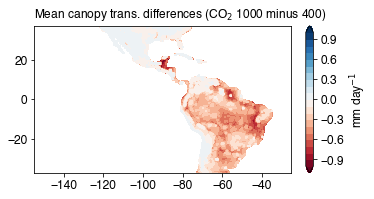

In [25]:
fontsize = 12
fig = mp.figure(figsize=(5,4))

ax = fig.add_subplot(111, aspect='equal')
contour_levels = numpy.arange(-1,1.1,0.1)
contour_plot = ax.contourf(xlong,xlat,numpy.nanmean(etran_diffs_landmask, axis=0), levels=contour_levels, extend='both', cmap='RdBu')
ax.tick_params(labelsize=fontsize)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='3%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label('mm day$^{-1}$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(ticks)
cbar.solids.set_edgecolor('face')

for c in contour_plot.collections:
    c.set_edgecolor('face')

ax.text(s='Mean canopy trans. differences (CO$_2$ 1000 minus 400)', x=0., y=1.02, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.savefig('ETRAN_differences_mean_'+run_info+'.png', bbox_inches='tight', transparent=True, dpi=600)